# Lab 5 
----------------------------------------------------------------------
Author: Kevin Paganini   
Date: 10/5/2022   
Description: Lab 5 - Neural Networks   


Problem 1:
1. What do the parameters to the MLPClassifier class mean?
    - Hidden_layer_size: The number of neurons to use for the hidden layers.(shape of the network)
    - solver: How to optimize the weights, (lbfgs is an optimizer in the family of quasi-Newton methods)
    - max_iter: The solver iterates until convergence or this number of iterations
    - random_state: determines random_state to generate weights and bias (good for reproducibility)

2. Draw the network.
    !["Network drawing"](network.jpg)

3. What activation functions are used for each node?
    - Each function uses a relu function which is the default in sklearn MLPClassifiers.
    
 
Problem 2:
1. What are the dimensions of mlp_petals.coefs_[0] and mlp_petals.intercepts_[0]? Where do those dimensions come from?
- The dimensions of mlp_petals.coefs_[0] is: (2, 4) (Transposed it is 4, 2) 
- The dimensions of mlp_petals.intercepts_[0] is: (1,4) (Transposed it is 4, 1) 
The dimensions come from the way we set up the model. We chose 4 neurons and 1 layer (implicitly) therefore we have four coef (rows). The two comes from the input of the model. We chose two input features. Since each neuron is a weighted linear equation it needs a weight for the firsg feature, one for the second and a bias. hence two cols in the coef and one in the intercepts.

2. What are the dimensions of mlp_petals_models? What do the dimensions correspond to?

!["Dimensions of mlp_petals_models"](dims.jpg)

- The dimensions of mlp_petals_models corresponds to the linear function of each neuron. There are four neurons therefore four rows. And there are 3 columns for the 3 parameters of each linear function (2 coefficients and intercept)

3. Comment on the abilities of the lines to separate setosa vs the rest, versicolor vs the rest, and virginica vs the rest with petal features.
!["chart1"](chart1.jpg)
Sepal model:
    - Neuron 1 and 4: Do a pretty good job of distinguishing between setosa and the rest.
    - Neuron 2: Is distinguishing setosa vs non setosa, Anything below the line is setosa, above is non setosa.
    - Neuron 3: Anything below the line is virginica, anything above the line is non virginica
    

!["chart2"](chart2.png)

Petal model:
    - Neuron 1: Does a good job of distinguishing between setosa and non setosa
    - Neuron 2: starts to differentiate between virginica and versicolor
    - Neuron 3: Does not do much of anything. I guess it gives a general feel of the data and which way it is flowing, but it does not distinguish between classes.
    - Neuron 4: starts to also differentiate between virginica and versicolor

Problem 3:
1. How does a ReLU function differ from a logistic function? What would the heatmaps/contour plots look like if we used logistic function as an activation layer instead?
!["relu vs sigmoid"](reluVSsigmoid.png)
- Sigmoid allows negative vaues and squishes x = {-inf to +inf} between y= {0 to 1}.
- Relu sets all negative values to 0, and if its poisitve it is whatever the value is. 
- If we used sigmoid functions instead, the big purple patch that we have would be a lot less big, it would have a lot more values. The purple patch is the negative values and since sigmoid allows them to pass through they would also be represented in the graph. The color bar for the sigmoid graphs would also be from 0-1 not from 0 to whatever the highest value is.

2. A neural network consists of different layers and a final classification layer. Which activation function (ReLU or logistic) is more suitable to use for a classification layer? Which activation function is more suitable to use for an inner layer? – You may need to look up this information.
- Logistic is more suitable for classification layers as it provides a confidence / probability score of what class something is. 
- Relu is more suited towards inner layers as it lets positive values simply pass through. 

Problem 4:
1. How do the confusion matrices and accuracies of the two models compare? Did the transformed features produce a more accurate model?
- The confusion matrices and accuracies of both models are quite similar. I would give a slight edge to the transformed data features, however it is too close and I could not say one is better than the other, which I don't think was supposed to be the outcome for this. I think if we just used the petals it may be better, because those decision boundaries look a lot more promising than the sepal ones.

Side note: As seen in appendix it does seem that the transformed petal data alone does the best since that feature pair has a lot more correlation to target than the sepal feature pair.



Why dont these neurons converge to the same linear equation? Are they finding local minima?

## Setup

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Helper function to make figures look pretty

def make_pretty(ax, title, x_label, y_label):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    return ax


## Train Multilayer Perceptron (MLP) models on petal and sepal features

## Part 1

In [359]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']
print(y.shape)
print(X.shape)

df = pd.DataFrame(X)
feature_names = [x.replace(' (cm)', '') for x in iris['feature_names']]
df.columns = feature_names
df.head()

(150,)
(150, 4)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Part 2 and 3

In [360]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

scaled_X = StandardScaler().fit_transform(X)

mlp_petals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=10000, solver="lbfgs", random_state=42)
mlp_petals.fit(scaled_X[:,2:4], iris.target)

mlp_sepals = MLPClassifier(hidden_layer_sizes=(4,), max_iter=10000, solver="lbfgs", random_state=42)
mlp_sepals.fit(scaled_X[:,0:2], iris.target)

# Interesting
pred = mlp_sepals.predict(scaled_X[:,0:2])
accuracy_score(pred, iris.target)

pred = mlp_petals.predict(scaled_X[:,2:4])
accuracy_score(pred, iris.target)

# Petals is way better than sepals


0.96

# Visualize Planes learned by Individual Neurons

## Part 1 
Extract the weight vectors

In [361]:
mlp_petals_models = np.vstack([mlp_petals.intercepts_[0], mlp_petals.coefs_[0]]).T 
mlp_sepals_models = np.vstack([mlp_sepals.intercepts_[0], mlp_sepals.coefs_[0]]).T

mlp_petal_df = pd.DataFrame(mlp_petals_models, columns=('Intercept', 'Coefficient 1', 'Coefficient 2'))

mlp_sepal_df = pd.DataFrame(mlp_sepals_models, columns=('Intercept', 'Coefficient 1', 'Coefficient 2'))



mlp_petal_df.head()

mlp_petals.coefs_

[array([[-3.49414391,  1.64540459,  0.4626318 ,  3.66407143],
        [-3.45101104,  0.22179902, -0.88124963,  2.7625942 ]]),
 array([[ 3.70179277, -1.81468652, -2.39185271],
        [-2.6216052 ,  1.0166344 ,  0.70475568],
        [-0.12564504, -0.38543871,  0.206506  ],
        [-4.39768265,  0.09986603,  3.00176488]])]

In [362]:
mlp_sepal_df.head()

,Intercept,Coefficient 1,Coefficient 2
0,10.559772,-15.817310,25.698971
1,20.387507,11.252340,3.052438
2,-8.263547,6.017638,-2.060225
3,3.068885,-4.022124,7.629039


## Part 2 
Rearrange the following equation to solve for $x_2$

$0 = B_{0} + B_{1} x_{1} + B_{2} x_{2}$

$-B_2 x_2 = B_{0} + B_{1} x_{1}$

$ x_2 = \frac{B_{0} + B_{1} x_{1}}{-B_2}$


## Part 3


[[ 10.55977232 -15.81730971  25.6989707 ]
 [ 20.3875066   11.25233986   3.0524381 ]
 [ -8.26354682   6.01763844  -2.06022503]
 [  3.06888455  -4.02212387   7.62903872]]


<AxesSubplot:title={'center':'Sepal length model perceptrons + Scatter plot iris'}, xlabel='sepal length', ylabel='sepal width'>

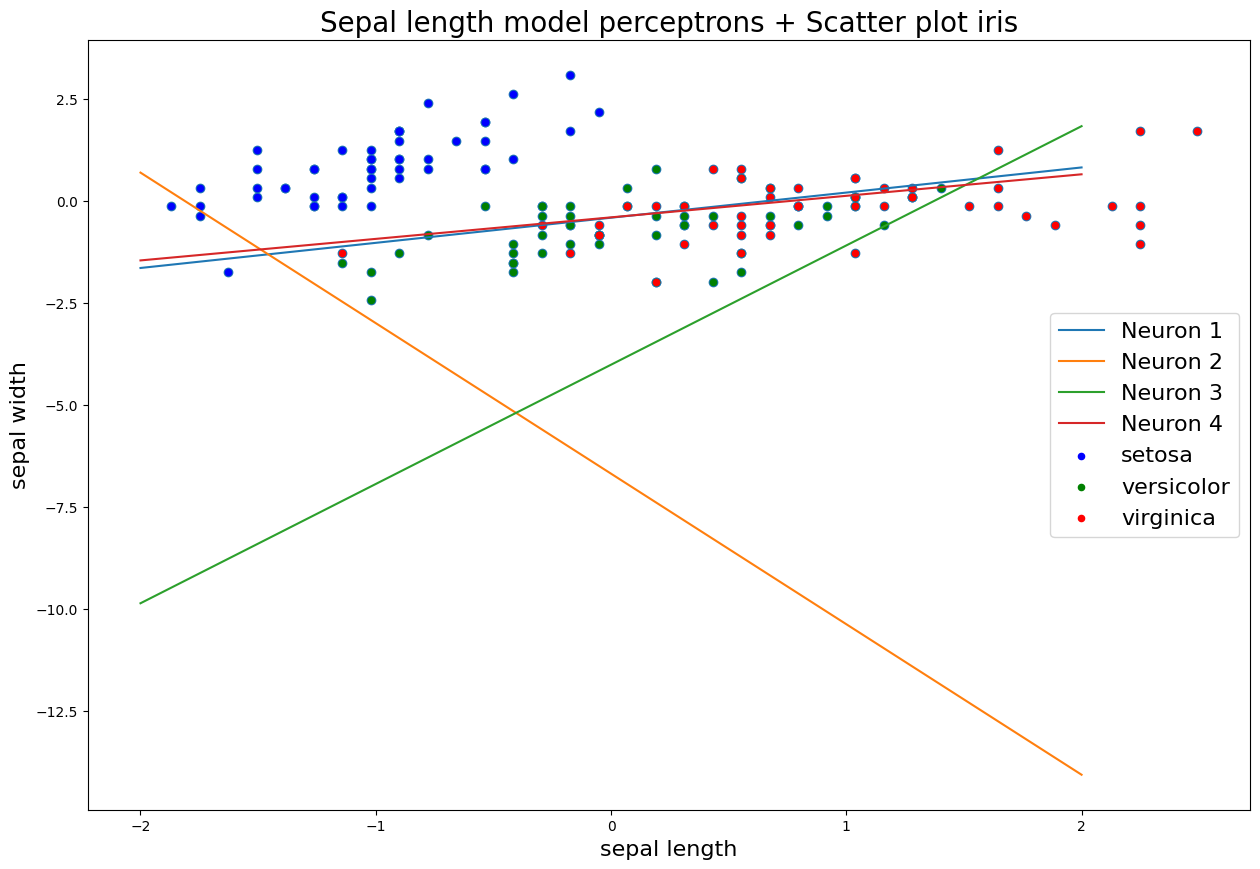

In [363]:
# Plot features 0 and 1 from scaled_X along with the planes 
# for the 4 neurons in the hidden layer. Use 100 points in 
# the range [-2, 2] for x_{1}x 
# to calculate the corresponding x_{2}x

x_mesh = np.linspace(-2, 2, 100)
full = np.hstack((scaled_X, iris.target.reshape(150, 1)))
full_df = pd.DataFrame(full, columns=["sepal length", "sepal width", "petal length", "petal width", 'target'])
full_df_0 = full_df[full_df['target'] == 0]
full_df_1 = full_df[full_df['target'] == 1]
full_df_2 = full_df[full_df['target'] == 2]
model_params = mlp_sepal_df.values
print(model_params)
# Model evaluation
predict = lambda x, param : (param[0] + param[1]*x) / (-param[2]) 




ys = []
for param in model_params:
    y = predict(x_mesh, param)
    ys.append(y)
outputs = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(scaled_X[:,0], scaled_X[:,1])
for i in range(4):
    ax.plot(x_mesh, outputs[i], label=f'Neuron {i + 1}')
    

# ['setosa', 'versicolor', 'virginica']
full_df_0.plot(kind='scatter', ax=ax, x='sepal length', y='sepal width', color='b', label='setosa')
full_df_1.plot(kind='scatter', ax=ax, x='sepal length', y='sepal width', color='g', label='versicolor')
full_df_2.plot(kind='scatter', ax=ax, x='sepal length', y='sepal width', color='r', label='virginica')

make_pretty(ax, 'Sepal length model perceptrons + Scatter plot iris', x_label='sepal length', y_label='sepal width')






## Part 4

<AxesSubplot:title={'center':'Petal length model perceptrons + Scatter plot iris'}, xlabel='petal length', ylabel='petal width'>

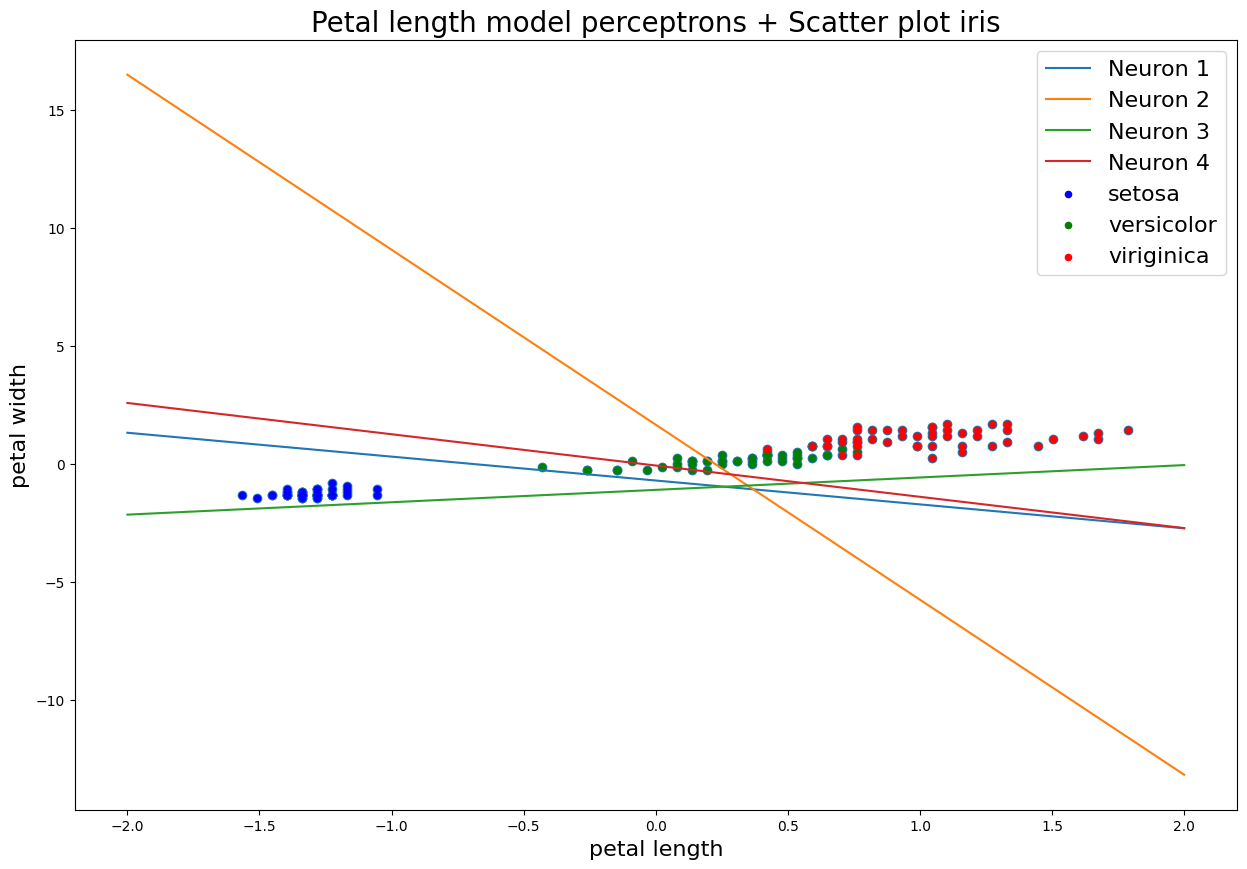

In [364]:
model_params = mlp_petal_df.values

ys = []
for param in model_params:
    y = predict(x_mesh, param)
    ys.append(y)
outputs = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(scaled_X[:,2], scaled_X[:,3])
for i in range(4):
    ax.plot(x_mesh, outputs[i], label=f'Neuron {i + 1}')
    
# ['setosa', 'versicolor', 'virginica']

full_df_0.plot(kind='scatter', ax=ax, x='petal length', y='petal width', color='b', label='setosa')
full_df_1.plot(kind='scatter', ax=ax, x='petal length', y='petal width', color='g', label='versicolor')
full_df_2.plot(kind='scatter', ax=ax, x='petal length', y='petal width', color='r', label='viriginica')

make_pretty(ax, 'Petal length model perceptrons + Scatter plot iris', x_label='petal length', y_label='petal width')

## Visualize Decision Boundaries Resulting from Planes and ReLU Activation Function

### Part 1 and 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(10000, 2)

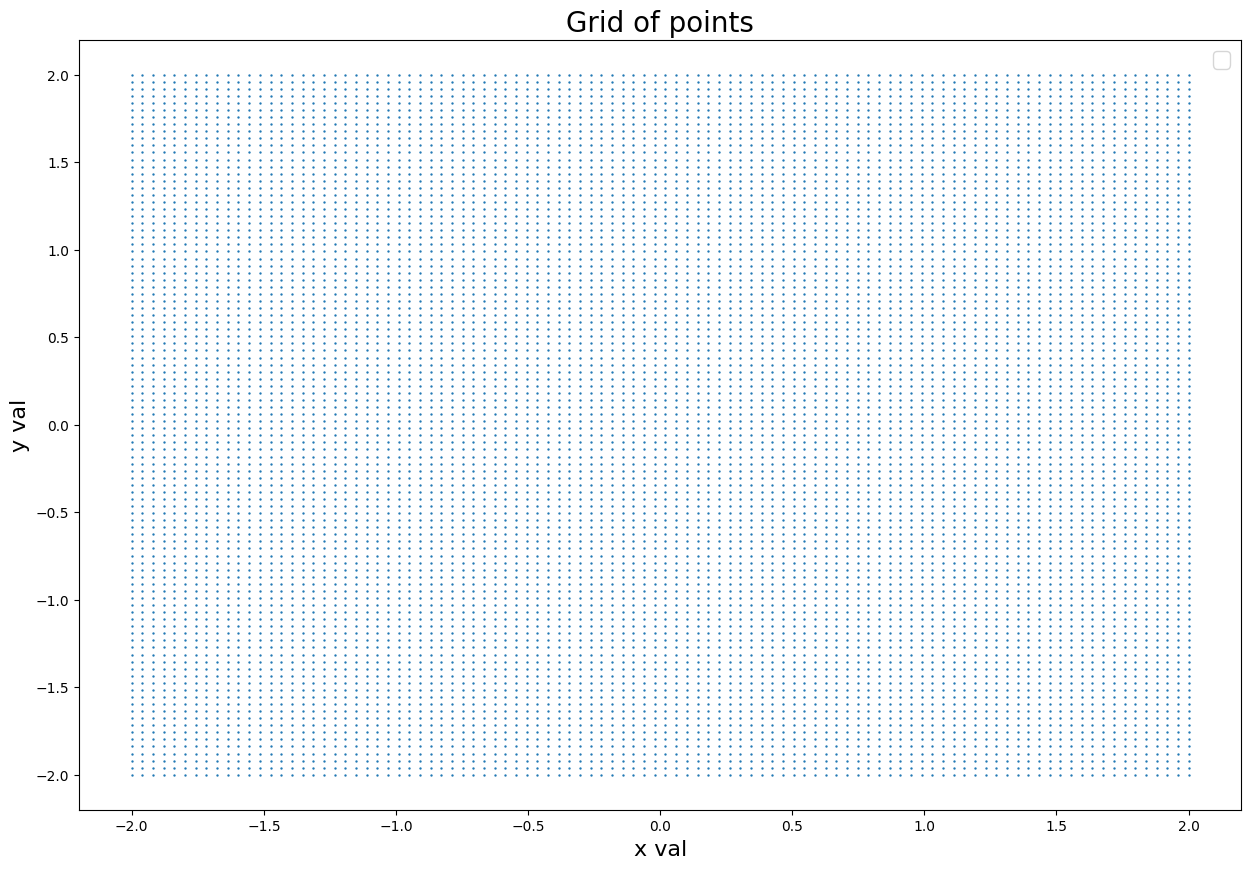

In [365]:
x = np.linspace(-2, 2, 100)
y = x
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(xx, yy, s=0.5)
make_pretty(ax, 'Grid of points', 'x val', 'y val')
grid_points = np.hstack((xx.reshape(-1, 1), yy.reshape(-1,1)))
grid_points.shape

## Part 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


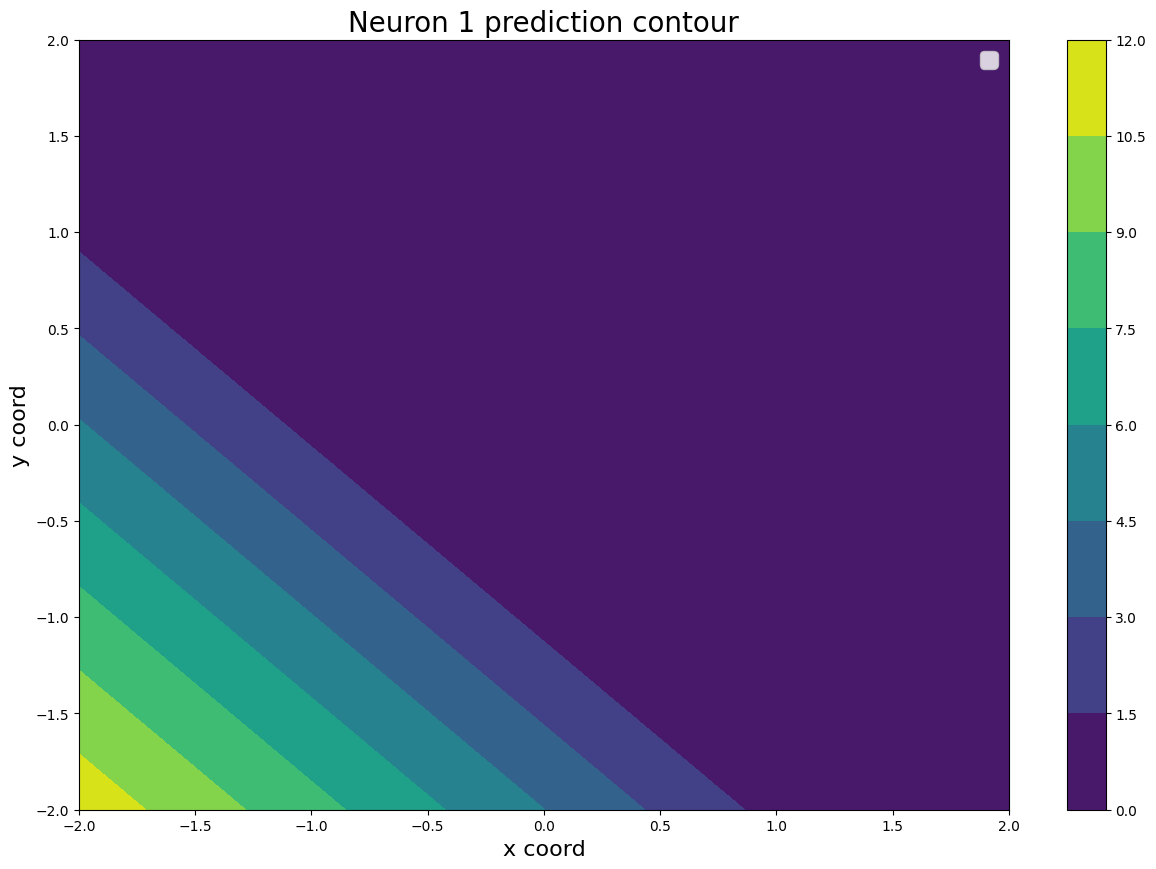

In [366]:
from neurons import Input
from neurons import Neuron

input = Input()

p_layer_1 = Neuron([input], mlp_petals_models[0, :])

pred_1 = p_layer_1.predict(grid_points)

fig, ax = plt.subplots(figsize=(15, 10))
xx, yy = np.meshgrid(x, y)

cp = ax.contourf(xx, yy,  pred_1.reshape(100, 100))
make_pretty(ax, "Neuron 1 prediction contour", 'x coord', 'y coord')
fig.colorbar(cp)

## Part 5

## Repeat for the remaining 3 neurons in the hidden layer.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


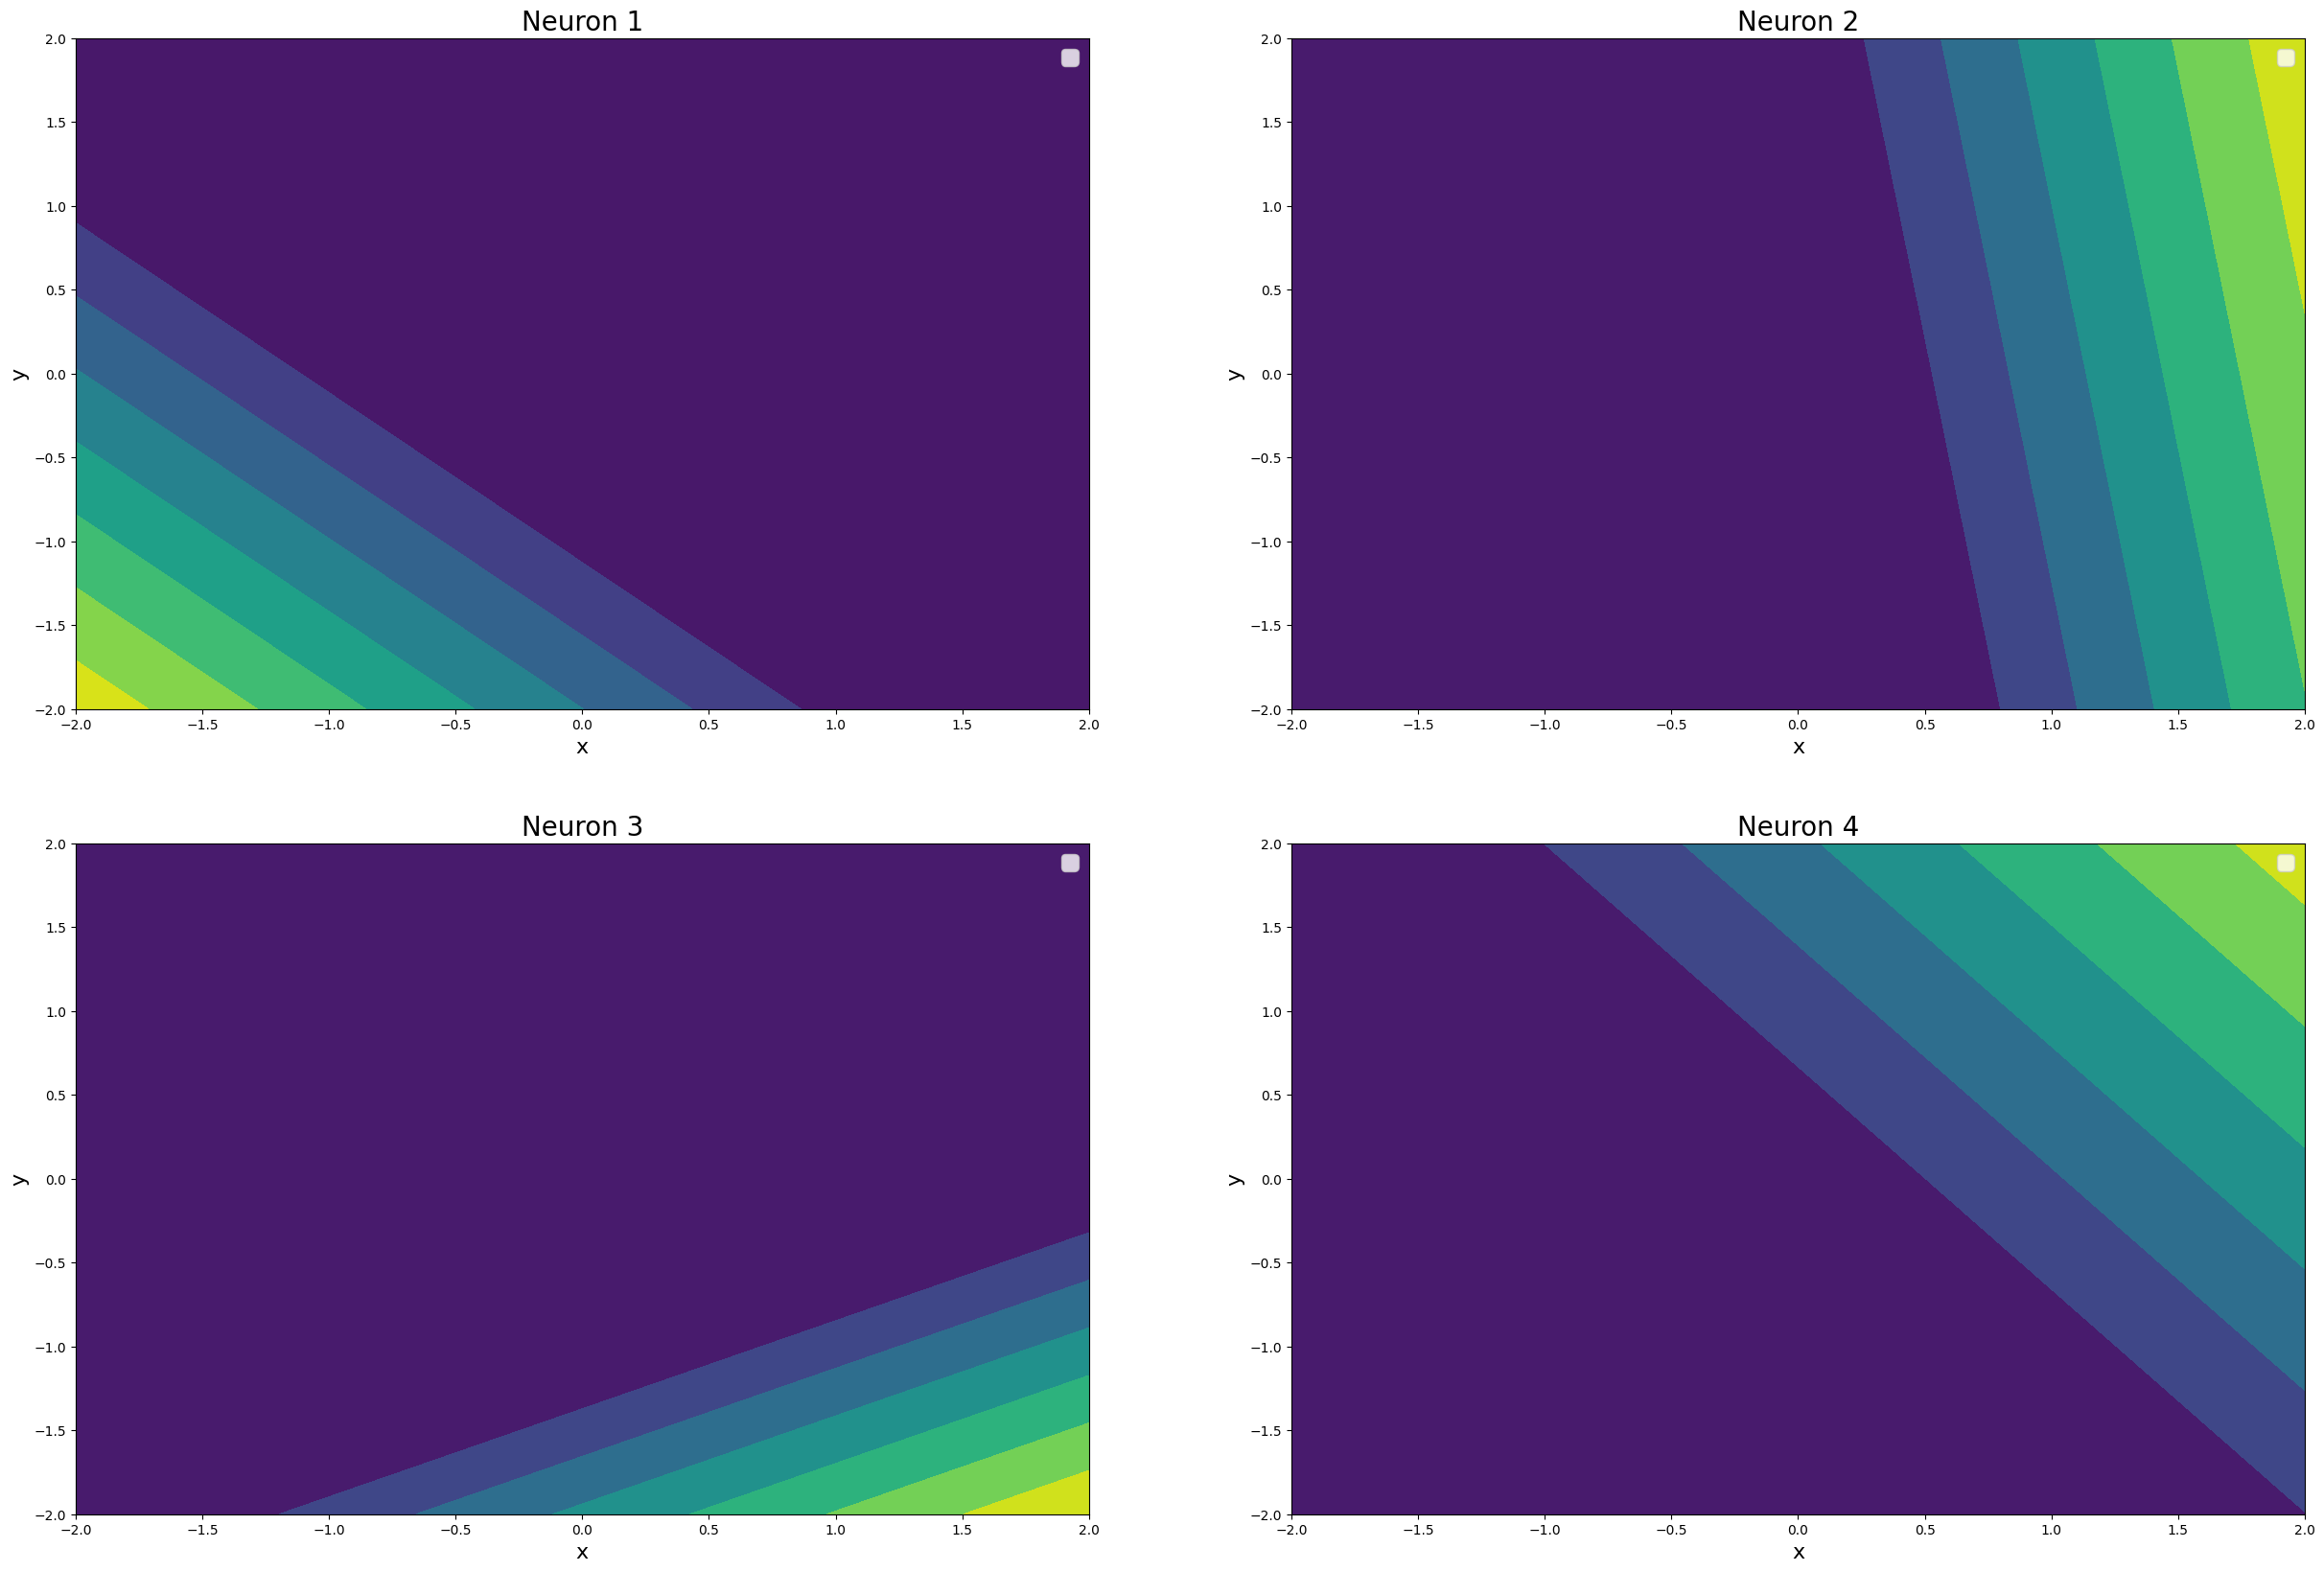

In [367]:
xx, yy = np.meshgrid(x, y)

p_layer_2 = Neuron([input], mlp_petals_models[1, :])

p_layer_3 = Neuron([input], mlp_petals_models[2, :])

p_layer_4 = Neuron([input], mlp_petals_models[3, :])

p_layers = [p_layer_1, p_layer_2, p_layer_3, p_layer_4]
predictions = []
for p in p_layers:
    
    predictions.append(p.predict(grid_points))
    
fig, ax = plt.subplots(figsize=(30, 20), nrows=2, ncols=2)
i = 0
for row in range(2):
    for col in range(2):
        
        cp = ax[row, col].contourf(xx, yy,  predictions[i].reshape(100,100))
        # can't add colorbar because it will mess up the sizing of the plots
        # fig.colorbar(cp) makes it look bad
        i += 1
        make_pretty(ax[row, col], f"Neuron {i}", "x", "y")

## Part 6

## Repeat this process for the hidden layer of the sepals model.

In [368]:
# We need to do this for the second (1) and third (2) layer


mlp_sepal_df.head()

,Intercept,Coefficient 1,Coefficient 2
0,10.559772,-15.817310,25.698971
1,20.387507,11.252340,3.052438
2,-8.263547,6.017638,-2.060225
3,3.068885,-4.022124,7.629039


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Sepal layer 3'}, xlabel='x', ylabel='y'>

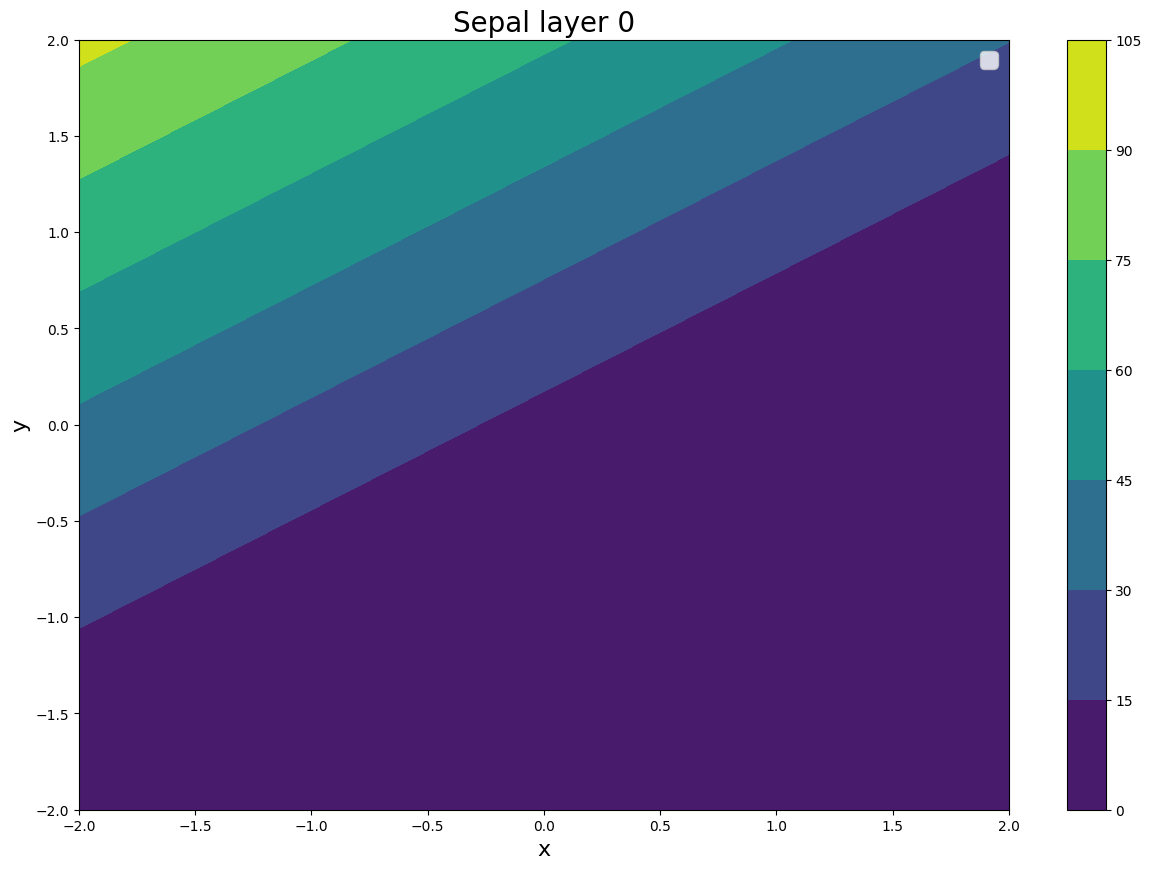

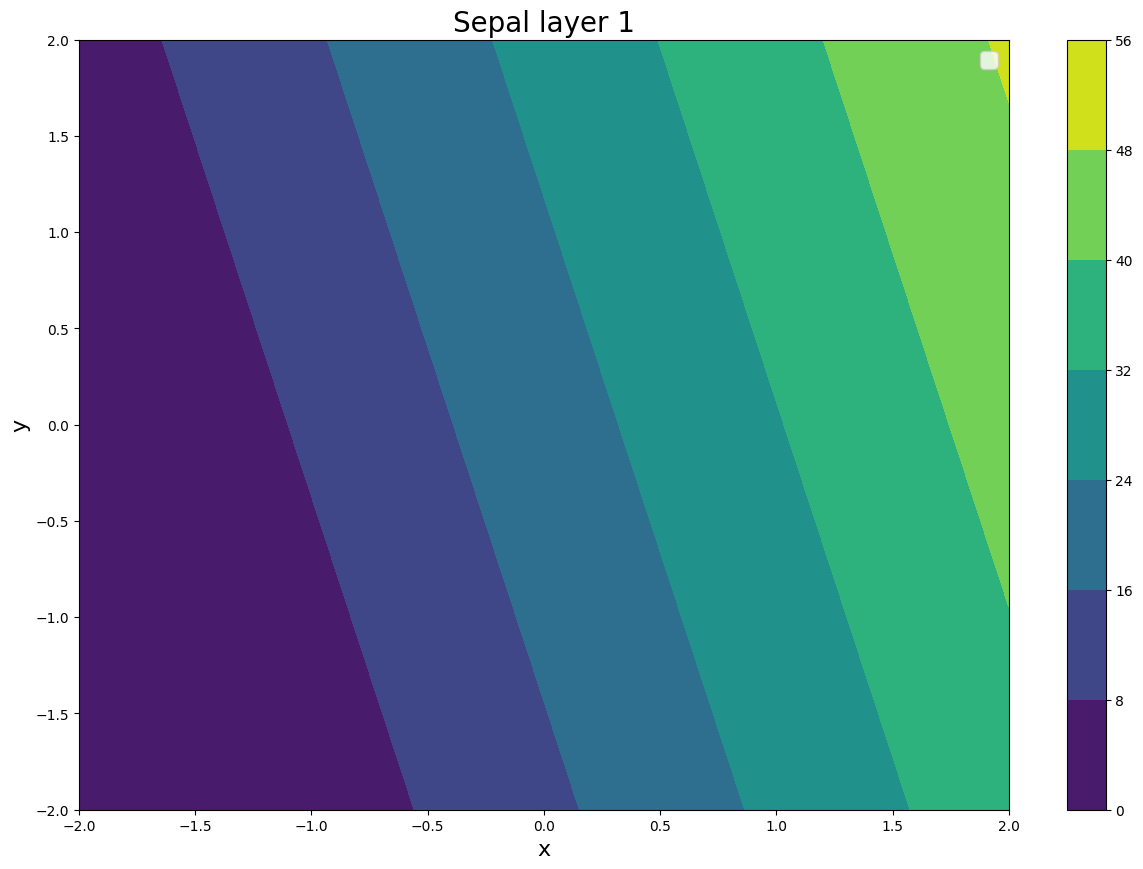

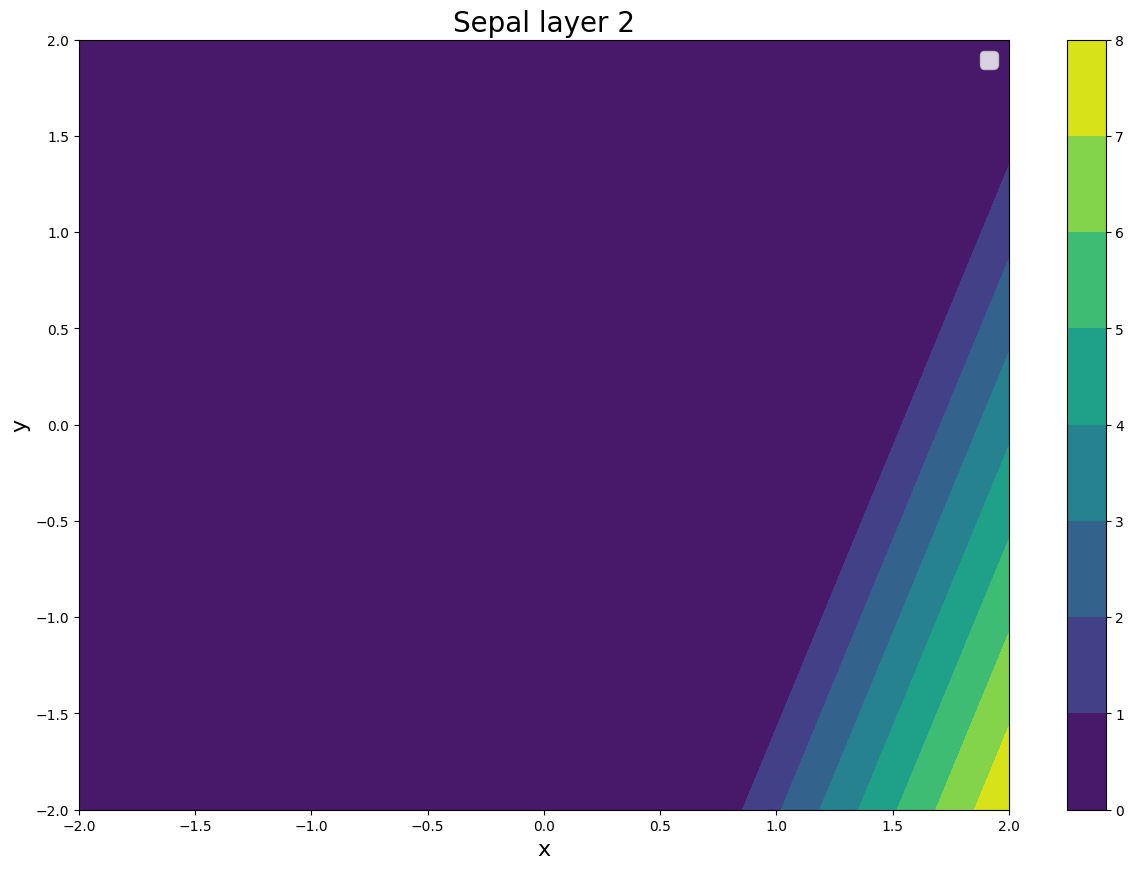

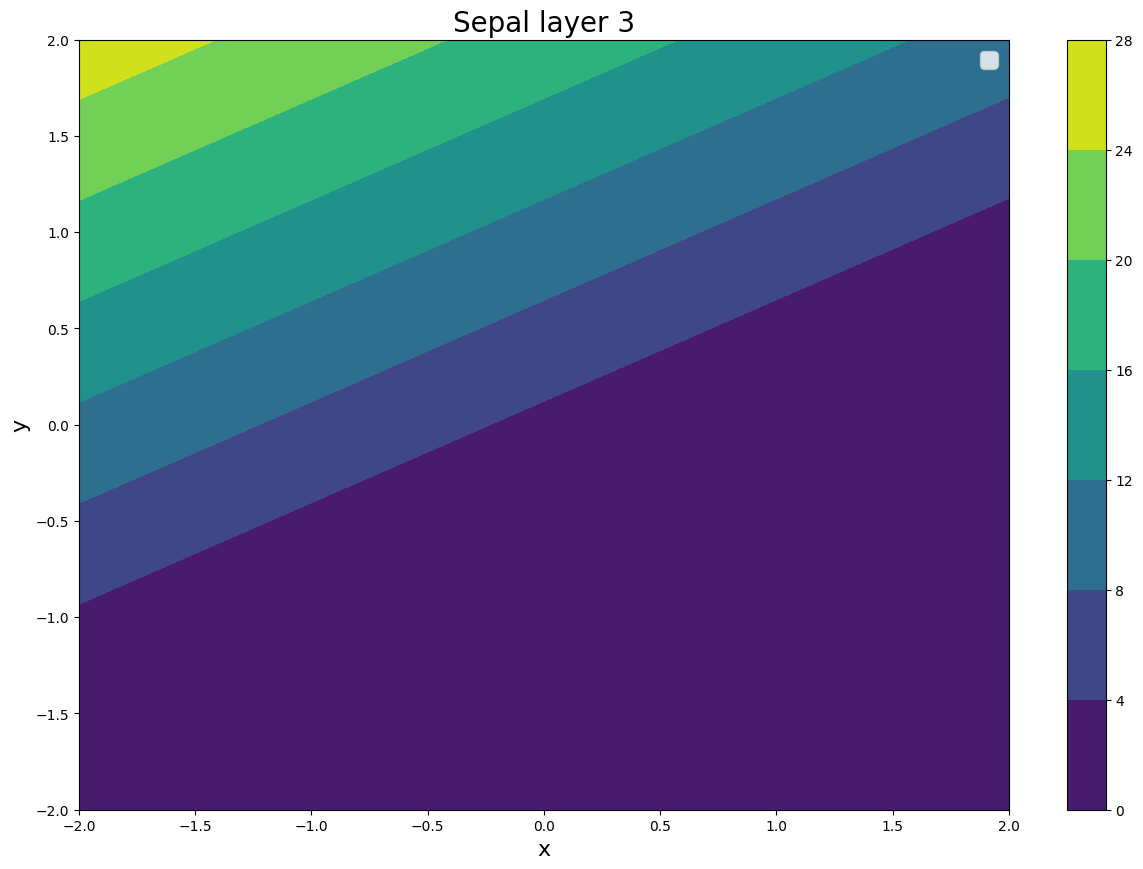

In [369]:

input = Input()
s_layer_0 = Neuron([input], mlp_sepal_df.iloc[0])
s_layer_1 = Neuron([input], mlp_sepal_df.iloc[1])
s_layer_2 = Neuron([input], mlp_sepal_df.iloc[2])
s_layer_3 = Neuron([input], mlp_sepal_df.iloc[3])



pred_0 = s_layer_0.predict(grid_points)
pred_1 = s_layer_1.predict(grid_points)
pred_2 = s_layer_2.predict(grid_points)
pred_3 = s_layer_3.predict(grid_points)


fig, ax = plt.subplots(figsize=(15,10))

cp = ax.contourf(xx, yy, pred_0.reshape(100, 100))
make_pretty(ax, 'Sepal layer 0', 'x', 'y')
fig.colorbar(cp)

fig, ax = plt.subplots(figsize=(15,10))
cp = ax.contourf(xx, yy, pred_1.reshape(100, 100))
fig.colorbar(cp)
make_pretty(ax, 'Sepal layer 1', 'x', 'y')

fig, ax = plt.subplots(figsize=(15,10))
cp = ax.contourf(xx, yy, pred_2.reshape(100, 100))
fig.colorbar(cp)
make_pretty(ax, 'Sepal layer 2', 'x', 'y')

fig, ax = plt.subplots(figsize=(15,10))
cp = ax.contourf(xx, yy, pred_3.reshape(100, 100))
fig.colorbar(cp)
make_pretty(ax, 'Sepal layer 3', 'x', 'y')

## Train logisitc regression models on transformed and original features


## Part 1, 2 and 3

In [370]:
from neurons import HStack


p_layer_1 = Neuron([input], mlp_petals_models[0, :])
p_layer_2 = Neuron([input], mlp_petals_models[1, :])
p_layer_3 = Neuron([input], mlp_petals_models[2, :])
p_layer_4 = Neuron([input], mlp_petals_models[3, :])
stacked = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])
transformed_petals_X = stacked.predict(scaled_X[:, 2:])


s_layer_1 = Neuron([input], mlp_sepals_models[0, :])
s_layer_2 = Neuron([input], mlp_sepals_models[1, :])
s_layer_3 = Neuron([input], mlp_sepals_models[2, :])
s_layer_4 = Neuron([input], mlp_sepals_models[3, :])
stacked = HStack([s_layer_1, s_layer_2, s_layer_3, s_layer_4])
transformed_sepals_X = stacked.predict(scaled_X[:, 0:2])



## Combining the two transformed feature matrices

In [371]:
full_transform = np.hstack((transformed_sepals_X, transformed_petals_X))


## Training two Logistic regression models (SGDClassifier) on the different datasets


In [372]:
from sklearn.linear_model import SGDClassifier

clf_1 = SGDClassifier(max_iter=1000,loss='log_loss')
clf_2 = SGDClassifier(max_iter=1000,loss='log_loss')




In [373]:
from sklearn.model_selection import cross_val_score

cv_acc_1 = cross_val_score(clf_1, scaled_X, iris.target, scoring='accuracy', cv=3)
print(f'Accuracy of first classifier trained on scaled data: {np.mean(cv_acc_1)}')

cv_acc_2 = cross_val_score(clf_2, full_transform, iris.target, scoring='accuracy', cv=3)
print(f'Accuracy of second classifier trained on transformed stacked data: {np.mean(cv_acc_2)}')

Accuracy of first classifier trained on scaled data: 0.9333333333333332
Accuracy of second classifier trained on transformed stacked data: 0.96


In [374]:
from sklearn.metrics import confusion_matrix

clf_1.fit(scaled_X, iris.target)
clf_2.fit(full_transform, iris.target)
pred_1 = clf_1.predict(scaled_X)
pred_2 = clf_2.predict(full_transform)

conf_mat_1 = confusion_matrix(iris.target, pred_1)

conf_mat_2 = confusion_matrix(iris.target, pred_2)

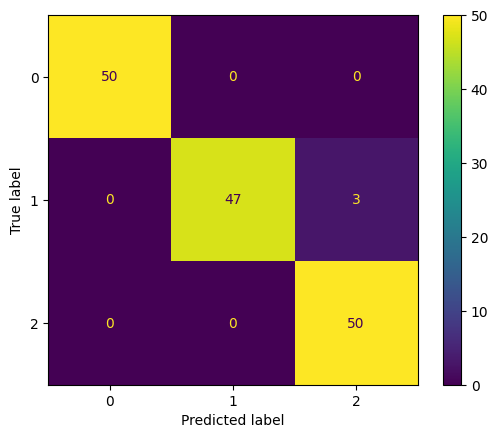

In [375]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_1, display_labels=clf_1.classes_)
disp.plot()

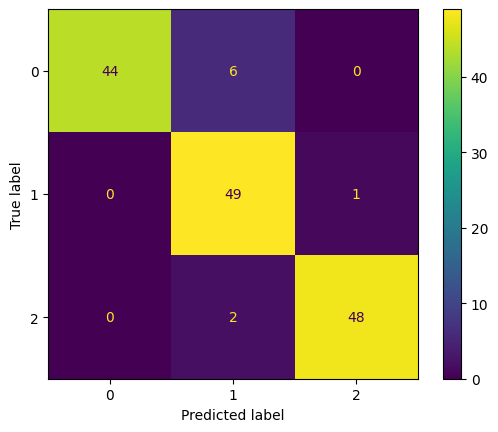

In [376]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_2, display_labels=clf_2.classes_)
disp.plot()

## Appendix


In [377]:
cv_acc_1 = cross_val_score(clf_1, scaled_X, iris.target, scoring='accuracy', cv=5)
print(f'Accuracy of first classifier trained on scaled data: {cv_acc_1}, {np.mean(cv_acc_1)}')

cv_acc_2 = cross_val_score(clf_2, full_transform, iris.target, scoring='accuracy', cv=5)
print(f'Accuracy of second classifier trained on transformed stacked data: {cv_acc_2}, {np.mean(cv_acc_2)}')

Accuracy of first classifier trained on scaled data: [0.9        0.96666667 0.93333333 0.86666667 0.96666667], 0.9266666666666665
Accuracy of second classifier trained on transformed stacked data: [0.86666667 1.         0.96666667 0.93333333 1.        ], 0.9533333333333334


In [378]:
clf_3 = SGDClassifier(max_iter=1000,loss='log_loss')
clf_3.fit(transformed_petals_X, iris.target)

SGDClassifier(loss='log_loss')

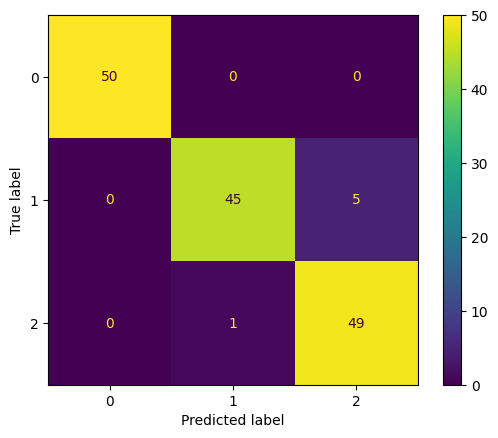

In [379]:
pred_3 = clf_3.predict(transformed_petals_X)
accuracy_score(iris.target, pred)
conf_mat_3 = confusion_matrix(iris.target, pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_3, display_labels=clf_2.classes_)
disp.plot()

In [380]:

cv_acc_3 = cross_val_score(clf_3, transformed_petals_X, iris.target, scoring='accuracy', cv=5)
print(f'Accuracy of second classifier trained on transformed stacked data: {cv_acc_3}, {np.mean(cv_acc_3)}')

Accuracy of second classifier trained on transformed stacked data: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ], 0.96
